Mounting Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls  "/content/drive/My Drive"

 2018-06				      'Project tracking.gsheet'
'3 unit.pdf'				       Resume.docx
'AI projects'				      'Resume_final (1).pdf'
"Anjali's Library"			       Resume_final.pdf
 application_test.csv			       Resume_Fresher_1.docx
 application_train.csv			       Resume_Fresher_1.gdoc
 bureau.csv				       Resume.gdoc
'Colab Notebooks'			       Resume.pdf
 CV.gdoc				       Resumes
 CV.pdf					      'sample customs form.pdf'
'Data science Cheatsheet.pdf'		       Screenshot_20190511-111651_2.png
 DeepLearning_B2			       Screenshot_20190511-111659.png
 Dictonary.py				       Transcripts
'Google Photos'				       Untitled-1.jpg
 IMP.gdoc				      'Untitled document (1).gdoc'
 Internships				      'Untitled document.gdoc'
 internships.docx			      'Untitled folder'
 lists.py				      'Untitled spreadsheet.gsheet'
'Liveguru French English Virtual Class.docx'   VisionAssistance
'paper dressing.jpg'			       writings
 Pictures


In [3]:
!ls  "/content/drive/My Drive/DeepLearning_B2/Brand_logo_detection/Train_Set"

da  hp


In [4]:
!unzip -uq "/content/drive/My Drive/Colab Notebooks/Brand_logo/Train_Set" -d "/content/drive/My Drive/Colab Notebooks/Brand_logo/Train"


KeyboardInterrupt: ignored

In [0]:
!unzip -uq "/content/drive/My Drive/Colab Notebooks/Brand_logo/Test_Set" -d "/content/drive/My Drive/Colab Notebooks/Brand_logo/Test"


Code

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import matplotlib.pyplot as plt

In [0]:
train_folder = "/content/drive/My Drive/Colab Notebooks/Brand_logo/Train/Train_Set"
test_folder = "/content/drive/My Drive/Colab Notebooks/Brand_logo/Test/Test_Set"

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
train_data = train_datagen.flow_from_directory(train_folder, target_size = (64, 64), batch_size = 1528, class_mode = 'binary')

Found 1528 images belonging to 2 classes.


In [15]:
test_data = test_datagen.flow_from_directory(test_folder, target_size = (64, 64), batch_size = 60, class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [11]:
type(train_data)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [0]:
x_train, y_train = train_data.next()

In [13]:
print(x_train.shape, y_train.shape)

(1528, 64, 64, 3) (1528,)


In [0]:
x_test, y_test = test_data.next()

In [17]:
print(x_test.shape, y_test.shape)

(60, 64, 64, 3) (60,)


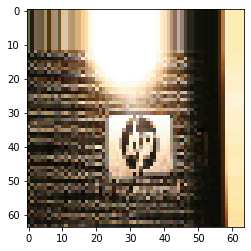

In [0]:
plt.imshow(x_train[])

In [0]:
y_train[0]

1.0

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape, y_train.shape)

(1002, 64, 64, 3) (1002,)


In [0]:
from tensorflow.keras import layers, models

In [0]:
model = models.Sequential()

In [0]:
def build_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(64,64,3)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) #signmoid because binary classification; if multi classification, use softmax
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [0]:
model = build_model()

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 790,721
Trainable params: 790,721
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist = model.fit(x_train,y_train,epochs=70)

Train on 1002 samples
Epoch 1/70
1002/1002 [==============================] - 0s 398us/sample - loss: 0.0803 - acc: 0.9760
Epoch 2/70
1002/1002 [==============================] - 0s 365us/sample - loss: 0.0687 - acc: 0.9760
Epoch 3/70
1002/1002 [==============================] - 0s 376us/sample - loss: 0.0642 - acc: 0.9810
Epoch 4/70
1002/1002 [==============================] - 0s 376us/sample - loss: 0.0641 - acc: 0.9721
Epoch 5/70
1002/1002 [==============================] - 0s 373us/sample - loss: 0.0728 - acc: 0.9760
Epoch 6/70
1002/1002 [==============================] - 0s 375us/sample - loss: 0.0676 - acc: 0.9790
Epoch 7/70
1002/1002 [==============================] - 0s 368us/sample - loss: 0.0661 - acc: 0.9810
Epoch 8/70
1002/1002 [==============================] - 0s 386us/sample - loss: 0.0309 - acc: 0.9930
Epoch 9/70
1002/1002 [==============================] - 0s 370us/sample - loss: 0.0906 - acc: 0.9701
Epoch 10/70
1002/1002 [==============================] - 0s 360us/sam

In [0]:
model.evaluate(x_test,y_test)

60/60 [==============================] - 0s 167us/sample - loss: 0.2103 - acc: 0.9000


[0.2103085736433665, 0.9]

Training with pre-trained models - ResNet50 (TRANSFER LEARNING)

In [18]:
ResNet = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(64,64,3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
94773248/94765736 [==============================] - 8s 0us/step


In [0]:
ResNet.trainable = False

In [0]:
global_average_layer = layers.GlobalAveragePooling2D()
output_layer = layers.Dense(1,activation='sigmoid')

tl_model = tf.keras.Sequential([ResNet, global_average_layer, output_layer])

In [0]:
tl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history = tl_model.fit(x_train,y_train, batch_size=4, epochs=5, verbose=1)

Train on 1528 samples
Epoch 1/5
1528/1528 [==============================] - 9s 6ms/sample - loss: 0.3239 - acc: 0.8547
Epoch 2/5
1528/1528 [==============================] - 8s 5ms/sample - loss: 0.1949 - acc: 0.9287
Epoch 3/5
1528/1528 [==============================] - 8s 5ms/sample - loss: 0.1627 - acc: 0.9385
Epoch 4/5
1528/1528 [==============================] - 8s 5ms/sample - loss: 0.1490 - acc: 0.9431
Epoch 5/5
1528/1528 [==============================] - 8s 5ms/sample - loss: 0.1482 - acc: 0.9424


In [44]:
tl_model.evaluate(x_test, y_test)

60/60 [==============================] - 1s 17ms/sample - loss: 0.8093 - acc: 0.5000


[0.8092702110608418, 0.5]